In [11]:
import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

llm=ChatGroq(model='llama-3.1-8b-instant')
llm.invoke('hello').content

'Hello. Is there something I can help you with or would you like to chat?'

In [12]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

class State(TypedDict):
    topic:str 
    characters:str
    settings: str
    premises : str
    story_intro: str

In [13]:
def generate_characters(state: State):
    msg=llm.invoke(f"create two character names and brief traits for a story about {state['topic']}")
    return {"characters": msg.content}
    

In [14]:
def generate_setting (state:State):
    msg=llm.invoke(f"Describe a vivid setting for a story about {state['topic']}")
    return {'settings':msg.content}

In [15]:
def generate_premise(state:State):
    msg=llm.invoke(f'Write a one-sentence plot premise for a story about {state['topic']}')
    return {'premises':msg.content}

In [16]:
def combine_elements(state:State):
    msg=llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state['characters']}\n"
        f"Settings: {state['settings']}\n"
        f"Premise: {state['premises']}"
    )
    return {'story_intro':msg.content}

In [17]:
graph=StateGraph(State)
graph.add_node("character",generate_characters)
graph.add_node("settings",generate_setting)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_elements)

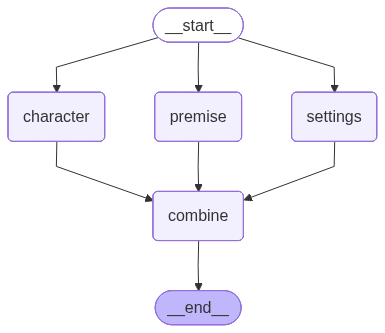

In [18]:
graph.add_edge(START,"character")
graph.add_edge(START,"premise")
graph.add_edge(START,"settings")

graph.add_edge('character','combine')
graph.add_edge('premise','combine')
graph.add_edge('settings','combine')

graph.add_edge('combine',END)

compiled_graph=graph.compile()
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [19]:
state={'topic':'time travel'}
result=compiled_graph.invoke(state)
print(result['story_intro'])

As the full moon cast its silvery glow over the city, Evelyn "Evie" Thompson stood before the dimly lit clock tower, her eyes fixed on the mysterious portal that had appeared within its crumbling walls. The air was alive with the scent of old wood and dust, and the faint tang of ozone hung heavy over the cobblestone streets below. Despite the eerie atmosphere, Evie felt a thrill of excitement coursing through her veins. She had always been drawn to the unexplained, the unknown, and the clock tower seemed to be the epicenter of a mystery that spanned centuries.

With her trusty notebook and pencil in hand, Evie had spent countless hours studying the clock tower's intricate mechanisms and deciphering the cryptic symbols etched into its stone walls. She was a historian and archaeologist, and she knew that this tower held secrets of the past that could rewrite the very fabric of history.

Just as Evie was about to step through the portal, a tall, dark-haired figure emerged from the shadows